In [34]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from data import load_diseases, load_network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
print(os.getcwd())

/Users/sabrieyuboglu/Documents/School/SNAP Research/disease-protein-prediction/source/notebooks


**Load Data**

In [115]:
diseases_dict = load_diseases("../../data/associations/disgenet-associations.csv")
m = len(diseases_dict)

In [116]:
ppi_networkx, ppi_network_adj, protein_to_node = load_network("../../data/networks/bio-pathways-network.txt")
n = ppi_network_adj.shape[0]
node_to_protein = {node: protein for protein, node in protein_to_node.items()}

**Popularity of Disease Nodes**

In [117]:
diseases = np.zeros((m, n), dtype=int)
count = 0
for i, disease in enumerate(diseases_dict.values()):
    disease_nodes = disease.to_node_array(protein_to_node)
    if 4000 in disease.proteins:
        count += 1
    diseases[i, disease_nodes] = 1
count

322

In [118]:
counts = np.sum(diseases, axis=0)

Text(0,0.5,'# of Associations')

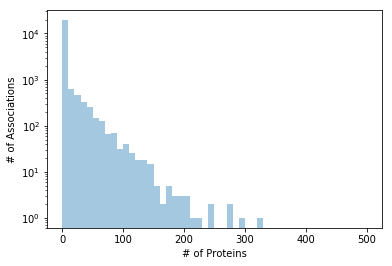

In [119]:
sns.distplot(counts, kde=False, hist_kws={'range':(0, 500)})
plt.yscale("log")
plt.xlabel("# of Proteins")
plt.ylabel("# of Associations")

In [120]:
total_associations = np.matmul(diseases, counts.reshape(n, 1)).squeeze()
average_associations = np.multiply(total_associations, np.power(np.sum(diseases, axis = 1, dtype=float), -1))

Text(0,0.5,'# of Diseases')

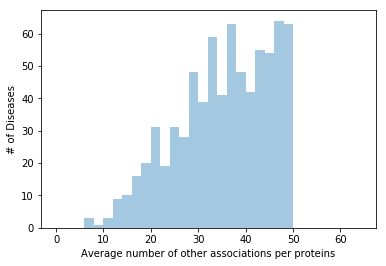

In [121]:
sns.distplot(average_associations, kde=False, hist_kws={'range':(0, 50)})
plt.xlabel("Average number of other associations per proteins")
plt.ylabel("# of Diseases")

In [122]:
common_associations = np.matmul(diseases, diseases.T)
np.fill_diagonal(common_associations, 0)

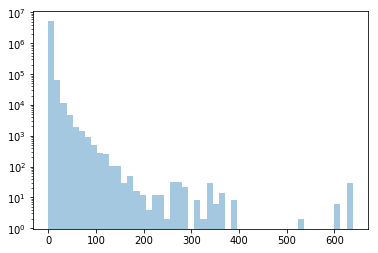

In [129]:
sns.distplot(common_associations.flatten(), kde=False)
plt.yscale("log")

In [124]:
np.max(common_associations.flatten())

638

In [126]:
np.argmax(common_associations)

349473

In [130]:
np.sum(common_associations >= 2)

918358

In [137]:
1.0*np.sum(common_associations >= 7)/(m**2)

0.04177961866180813